In [1]:
# Add matplotlib inline magic command
%matplotlib inline

# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Declare variables for files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Inspect the city data
# 1. Get all the rows that contain null values
# 2. Make sure the driver_count column has an integer data type.
# 3. Find out how many data points there are for each type of city.


In [6]:
#1. Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#1. Another way to check - i.e. shows that there are zero null values in all three columns
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
#2. Check data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
#3. Get the unique values in the 'type' column
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#3. Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
#3. Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [12]:
#3. Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [13]:
# Inspect the ride data
# 1. Get all the rows that contain null values
# 2. Make sure the fare and ride_id column has an integer data type.



In [14]:
#1. Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
#1. Another way to check - i.e. shows that there are zero null values in all four columns
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
#2. Check data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
# Merge the data into a single data set
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create a bubble chart showing avg fare vs total rides with bubble size based on avg number of drivers for each city type:
# 1. Create separate data frames for each city type
# 2. Get the average fare using the mean() method for each city in the fare column
# 3. Get the total number of rides for each city using the count() method for each city in the ride_id column
# 4. Get the average driver count for each city to make the bubble size correlate to the number of drivers for each city

In [21]:
#1. Create df for urban cities
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
#1. Create df for rural cities
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [26]:
#1. Create df for suburban cities
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [43]:
#2. Get the average fare for each city in urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [44]:
#2. Get the average fare for each city in rural cities
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [45]:
#2. Get the average fare for each city in suburban cities
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [39]:
#3. Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [40]:
#3. Get the number of rides for rural cities
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [41]:
#3. Get the number of rides for suburban cities
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [47]:
# 4. Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [48]:
# 4. Get the average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [49]:
# 4. Get the average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [50]:
# Create scatter plot
#1. Create separate scatter plot for each city type where x-axis is ride count and y-axis is avg fare
#2. Create a bubble chart for all cities

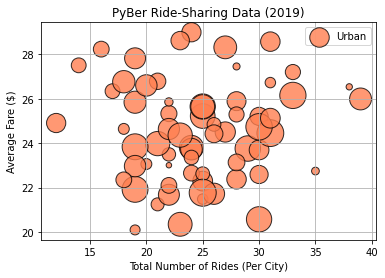

In [59]:
#1. Build the scatter plots for urban cities
plt.scatter(urban_ride_count, #x axis
            urban_avg_fare, #y axis
            s=10*urban_driver_count, #size of marker increased by factor of 10
            c="coral", #change colour of bubble to coral
            edgecolor="black", #changes colour of outline
            linewidths=1, #changes linewidths
            alpha=0.8, #makes bubble 20% transparent
            label="Urban") #label for legend
plt.title("PyBer Ride-Sharing Data (2019)") #title for chart
plt.ylabel("Average Fare ($)") #label for y axis
plt.xlabel("Total Number of Rides (Per City)") #label for x axis
plt.grid(True) #add gridlines to plot
plt.legend() #add legend



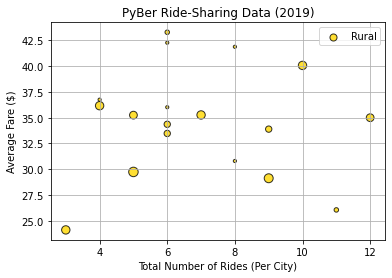

In [60]:
#1. Build the scatter plots for rural cities
plt.scatter(rural_ride_count, #x axis
            rural_avg_fare, #y axis
            s=10*rural_driver_count, #size of marker increased by factor of 10
            c="gold", #change colour of bubble to coral
            edgecolor="black", #changes colour of outline
            linewidths=1, #changes linewidths
            alpha=0.8, #makes bubble 20% transparent
            label="Rural") #label for legend
plt.title("PyBer Ride-Sharing Data (2019)") #title for chart
plt.ylabel("Average Fare ($)") #label for y axis
plt.xlabel("Total Number of Rides (Per City)") #label for x axis
plt.grid(True) #add gridlines to plot
plt.legend() #add legend


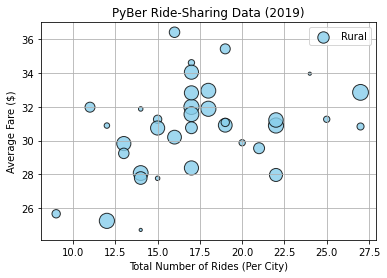

In [61]:
#1. Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, #x axis
            suburban_avg_fare, #y axis
            s=10*suburban_driver_count, #size of marker increased by factor of 10
            c="skyblue", #change colour of bubble to coral
            edgecolor="black", #changes colour of outline
            linewidths=1, #changes linewidths
            alpha=0.8, #makes bubble 20% transparent
            label="Rural") #label for legend
plt.title("PyBer Ride-Sharing Data (2019)") #title for chart
plt.ylabel("Average Fare ($)") #label for y axis
plt.xlabel("Total Number of Rides (Per City)") #label for x axis
plt.grid(True) #add gridlines to plot
plt.legend() #add legend


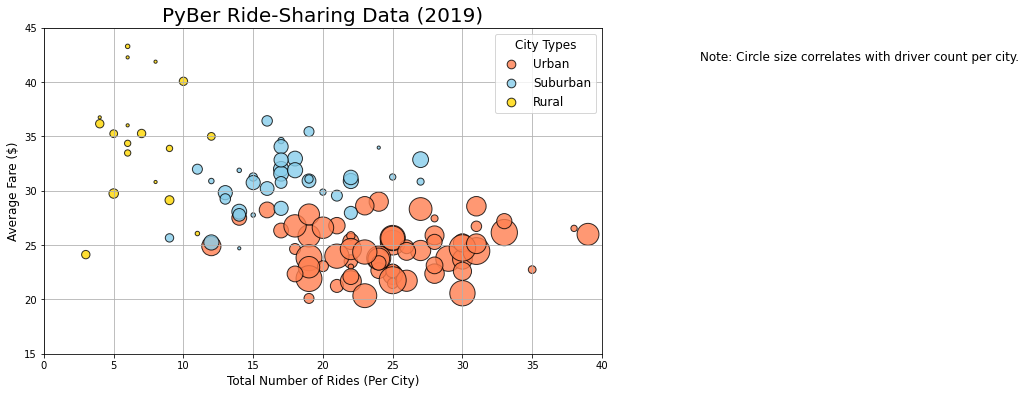

In [89]:
#2. Combine the scatter charts for each type of city.
plt.subplots(figsize=(10, 6)) #adjusts figure size
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.xlim(0,40)
plt.ylim(15,45)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", #font size
                  mode="Expanded", #expands the legend horizontally
                  scatterpoints=1, #refers to the number of scatter points for each marker in the legend
                  loc="best", #sets legend where it will fit best based on plotting of data points
                  title="City Types") #give legend a title
lgnd.legendHandles[0]._sizes = [75] #sets first marker in legend equal to 75-point font
lgnd.legendHandles[1]._sizes = [75] #sets second marker in legend equal to 75-point font
lgnd.legendHandles[2]._sizes = [75] #sets third marker in legend equal to 75-point font
lgnd.get_title().set_fontsize(12) #Increse font size of legend title to 12

# Incorporate a text label about circle size.
plt.text(47, 42, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()

In [90]:
# Get summary statistics urban cities.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [92]:
# Get summary statistics rural cities.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [93]:
# Get summary statistics for suburban cities.
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [94]:
# Get summary statistic for urban ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [95]:
# Get summary statistic for rural ride count
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [96]:
# Get summary statistic for suburban ride count
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [98]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(rural_ride_count.mean(),2), round(suburban_ride_count.mean(),2)

(24.62, 6.94, 17.36)

In [99]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(rural_ride_count.median(),2), round(suburban_ride_count.median(),2)

(24.0, 6.0, 17.0)

In [100]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [101]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
dtype: int64

In [102]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [103]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [104]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [105]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [106]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [109]:
# Calculate the measures of central tendency for the average fare for the urban cities.

# Get the fares for the urban cities by creating a series with all the fares
urban_fares = urban_cities_df["fare"]

# Calculate mean using NumPy mean function
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

# Calculate median using NumPy median function
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

# Calculate mode using SciPy stats mode function
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [110]:
# Calculate the measures of central tendency for the average fare for the rural cities.

# Get the fares for the rural cities by creating a series with all the fares
rural_fares = rural_cities_df["fare"]

# Calculate mean using NumPy mean function
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

# Calculate median using NumPy median function
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

# Calculate mode using SciPy stats mode function
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [111]:
# Calculate the measures of central tendency for the average fare for the suburban cities.

# Get the fares for the suburban cities by creating a series with all the fares
suburban_fares = suburban_cities_df["fare"]

# Calculate mean using NumPy mean function
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

# Calculate median using NumPy median function
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

# Calculate mode using SciPy stats mode function
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [113]:
# Calculate the measures of central tendency for driver count for the urban cities.

# Get the driver countfor the urban cities by creating a series 
urban_drivers = urban_cities_df["driver_count"]

# Calculate mean using NumPy mean function
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities {mean_urban_drivers:.2f}.")

# Calculate median using NumPy median function
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.2f}.")

# Calculate mode using SciPy stats mode function
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

The mean driver count for urban cities 36.68.
The median driver count for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [114]:
# Calculate the measures of central tendency for driver count for the rural cities.

# Get the driver count for the rural cities by creating a series 
rural_drivers = rural_cities_df["driver_count"]

# Calculate mean using NumPy mean function
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities {mean_rural_drivers:.2f}.")

# Calculate median using NumPy median function
median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.2f}.")

# Calculate mode using SciPy stats mode function
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")

The mean driver count for rural cities 4.30.
The median driver count for rural cities is 4.00.
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


In [115]:
# Calculate the measures of central tendency for driver count for the suburban cities.

# Get the driver count for the suburban cities by creating a series 
suburban_drivers = suburban_cities_df["driver_count"]

# Calculate mean using NumPy mean function
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities {mean_suburban_drivers:.2f}.")

# Calculate median using NumPy median function
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.2f}.")

# Calculate mode using SciPy stats mode function
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

The mean driver count for suburban cities 13.71.
The median driver count for suburban cities is 16.00.
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).


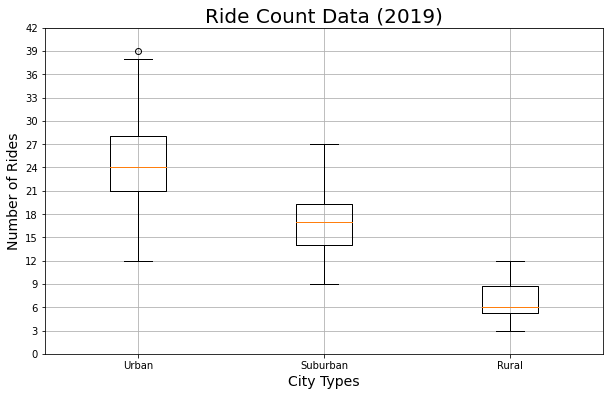

In [119]:
# Create Box-and-Whisker Plots for Ride Count Data

# Create a box-and-whisker plot for the city types ride count.
x_labels = ["Urban", "Suburban","Rural"] #create the x-axis labels with a list
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count] #list of data
fig, ax = plt.subplots(figsize=(10, 6)) #adjust figure size
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels) #data and labels are passed in the boxplot function
ax.set_yticks(np.arange(0, 45, step=3.0)) #set ticks with range from 0 to 45 at an increment of 3
ax.grid() #show gridlines

plt.savefig("Analysis/Fig2.png") # Save the figure.

plt.show() #show plot

In [122]:
# Get the city that matches 39 (i.e. the outlier in urban ride count series).
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


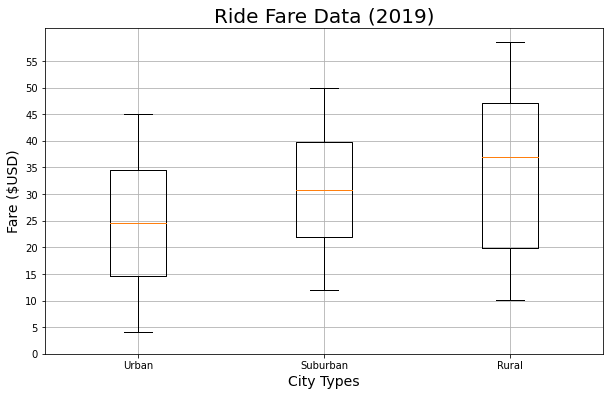

In [127]:
# Create Box-and-Whisker Plots for Ride Fare Data

# Create a box-and-whisker plot for the ride fare for each city type.
x_labels = ["Urban", "Suburban","Rural"] #create the x-axis labels with a list
ride_fare_data = [urban_fares, suburban_fares, rural_fares] #list of data
fig, ax = plt.subplots(figsize=(10, 6)) #adjust figure size
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels) #data and labels are passed in the boxplot function
ax.set_yticks(np.arange(0, 60, step=5.0)) #set ticks with range from 0 to 60 at an increment of 5
ax.grid() #show gridlines

plt.savefig("Analysis/Fig3.png") # Save the figure.

plt.show() #show plot

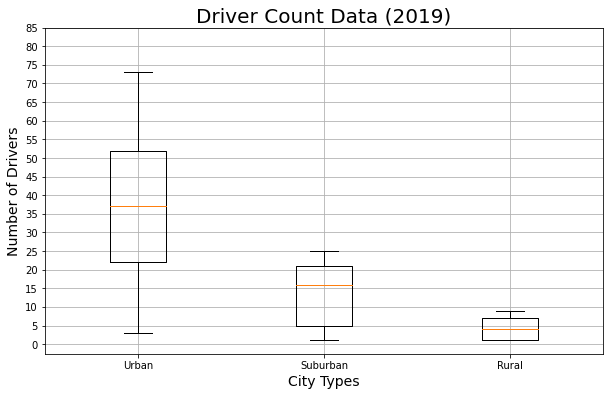

In [131]:
# Create Box-and-Whisker Plots for Driver Count Data

# Create a box-and-whisker plot for the driver count data for each city type.
x_labels = ["Urban", "Suburban","Rural"] #create the x-axis labels with a list
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers] #list of data
fig, ax = plt.subplots(figsize=(10, 6)) #adjust figure size
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels) #data and labels are passed in the boxplot function
ax.set_yticks(np.arange(0, 90, step=5.0)) #set ticks with range from 0 to 90 at an increment of 5
ax.grid() #show gridlines

plt.savefig("Analysis/Fig4.png") # Save the figure.

plt.show() #show plot